## **`Salary-Regression-Model`** ##

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score , mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [8]:
df = pd.read_csv('F:\\PYTHON\\ML_Projects\\Haider\'s_Projects\\job-salay-regression\\data\\raw\\salary_prediction_data.csv')
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [9]:
df['Location'].value_counts()

Location
Suburban    345
Rural       345
Urban       310
Name: count, dtype: int64

In [10]:
df.shape

(1000, 7)

In [11]:
df.info

<bound method DataFrame.info of        Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]>

In [12]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [13]:
df.duplicated().sum()

np.int64(0)


---
## `EDA` **Expository Data Analysis**

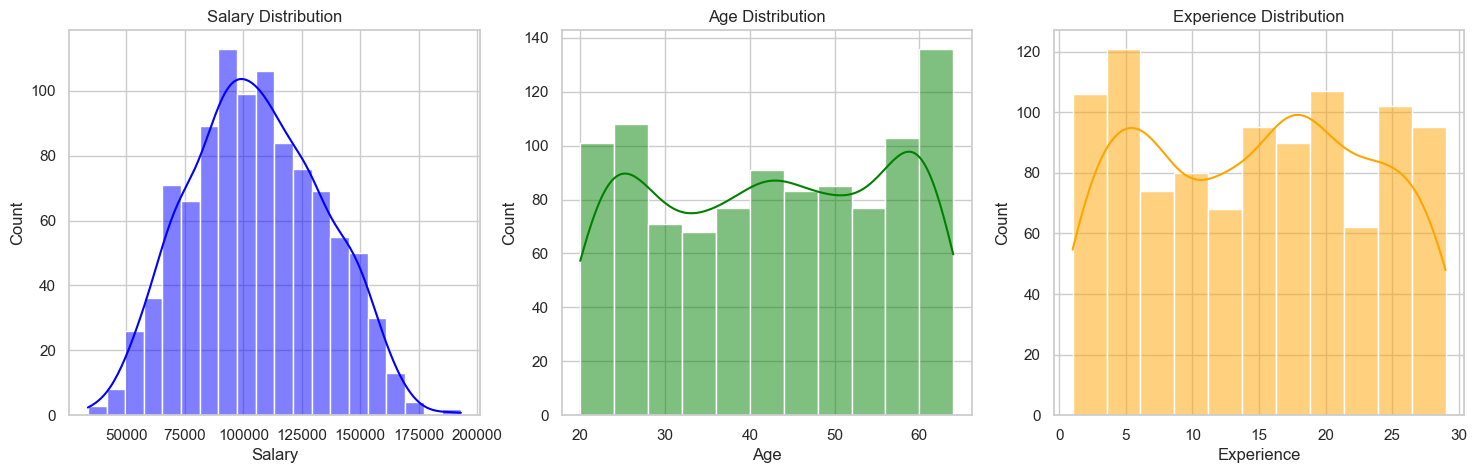

In [14]:
#set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Salary'], kde=True, ax=axes[0], color='blue').set_title('Salary Distribution')
sns.histplot(df['Age'], kde=True, ax=axes[1], color='green').set_title('Age Distribution')
sns.histplot(df['Experience'], kde=True, ax=axes[2], color='orange').set_title('Experience Distribution')

plt.show()

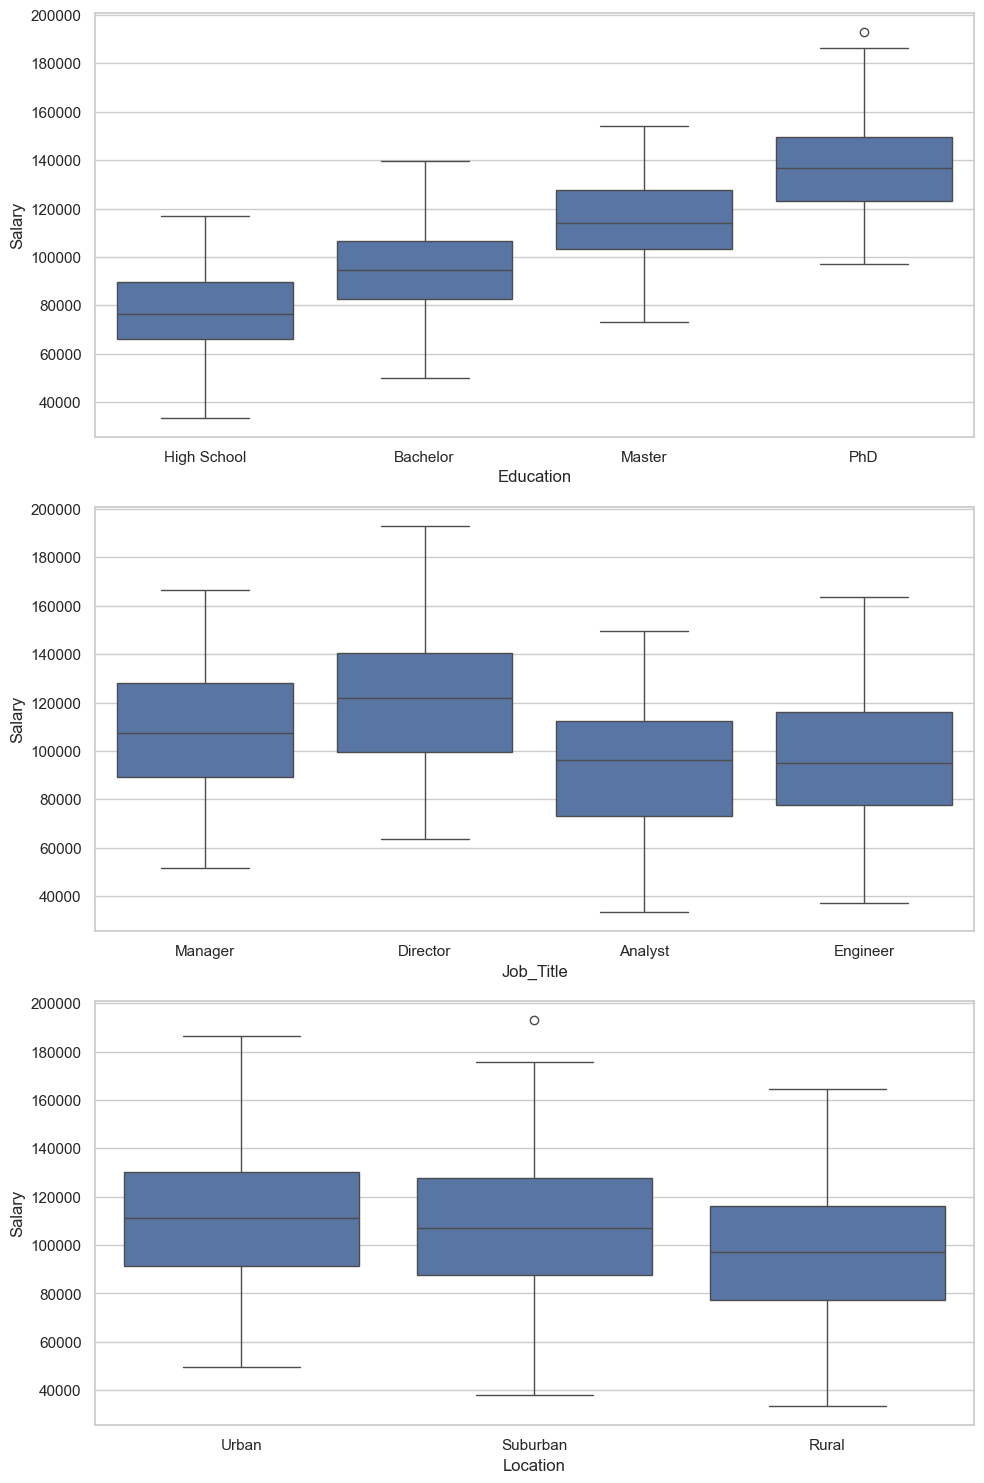

In [15]:
# Create boxplots to see how Salary varies by Category
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(x='Education', y='Salary', data=df, ax=axes[0], order=['High School', 'Bachelor', 'Master', 'PhD'])
sns.boxplot(x='Job_Title', y='Salary', data=df, ax=axes[1])
sns.boxplot(x='Location', y='Salary', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

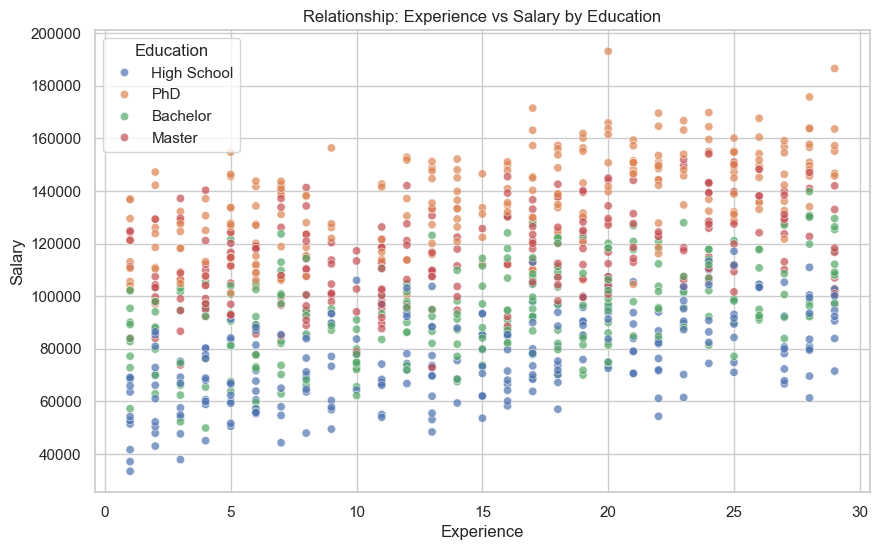

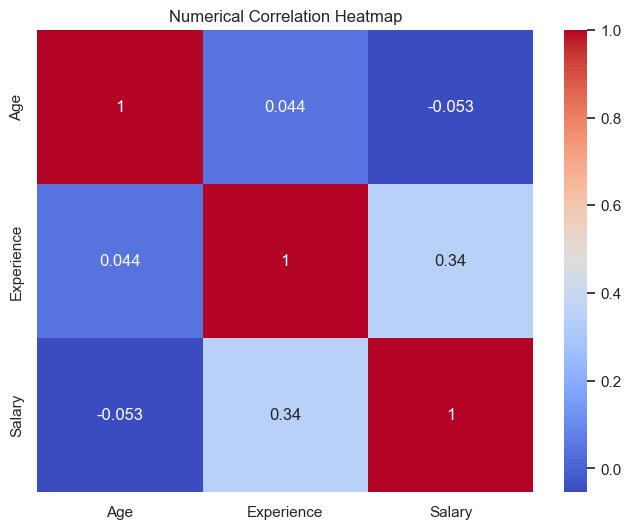

In [16]:
# Scatter plot for Experience vs Salary (colored by Education)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience', y='Salary', hue='Education', data=df, alpha=0.7)
plt.title('Relationship: Experience vs Salary by Education')
plt.show()

# Heatmap for numerical correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Experience', 'Salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Correlation Heatmap')
plt.show()

In [17]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [18]:
x = df.drop('Salary', axis=1)
y = df['Salary']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
y_train

29      75559.244114
535     85397.137796
695    112787.349256
557    107455.134948
836    108464.320139
           ...      
106     66723.680518
270     62891.766866
860    107445.343659
435     52716.988933
102     91289.995875
Name: Salary, Length: 800, dtype: float64


---
## **`Pre-Processing`**

In [21]:
ordinal_cols = ['Education', 'Job_Title']
nominal_cols = ['Location','Gender']
numeric_cols = ['Age', 'Experience']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('ord', OrdinalEncoder(categories=[
            ['High School', 'Bachelor', 'Master', 'PhD'], 
            ['Director','Analyst','Manager','Engineer']
        ]), ordinal_cols),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_cols)
    ]
)



---
## **Saving `Cleaned` Data**

In [22]:
# Apply preprocessing to the full dataset (features only)
x_cleaned = preprocessor.fit_transform(x)

# Convert to DataFrame for easy saving
# Get feature names for numeric and ordinal columns
num_features = numeric_cols
ord_features = ordinal_cols
# OneHotEncoder generates multiple columns, get names
nom_features = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_cols)

all_features = list(num_features) + list(ord_features) + list(nom_features)
df_cleaned = pd.DataFrame(x_cleaned, columns=all_features)

# Add target column back
df_cleaned['Salary'] = y.values

# Save to CSV
df_cleaned.to_csv("salary_data_cleaned.csv", index=False)
print("Cleaned dataset saved as 'salary_data_cleaned.csv'")


Cleaned dataset saved as 'salary_data_cleaned.csv'



---
## **`Model Training`**

In [23]:
import pickle
from sklearn.metrics import root_mean_squared_error

models = {
    # ===== Baselines =====
    "Linear Regression": LinearRegression(),
    "Ridge Regression (L2)": Ridge(alpha=1.0),
    "Lasso Regression (L1)": Lasso(alpha=0.01),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5),

    # ===== Distance / Margin =====
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5, weights="distance"),
    "SVR (RBF)": SVR(kernel="rbf", C=10, gamma="scale", epsilon=0.1),

    # ===== Tree Models =====
    "Decision Tree": DecisionTreeRegressor(
        max_depth=6,
        min_samples_split=10,
        random_state=42
    ),

    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ),

    # ===== Boosting =====
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),

    "AdaBoost": AdaBoostRegressor(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ),

    # ===== Advanced Boosting (ADDED) =====
    "XGBoost": xgb.XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ),

}

best_model = None
best_model_name = None
best_rmse = float("inf")   # regression → minimize error

for name, model in models.items():
    print(f"\n===== {name} =====")
    
    pipe = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    # Cross-validation (RMSE)
    cv_rmse = -cross_val_score(
        pipe, 
        x_train, 
        y_train, 
        cv=5, 
        scoring="neg_root_mean_squared_error"
    ).mean()
    
    print("CV RMSE:", cv_rmse)
    
    # Train
    pipe.fit(x_train, y_train)
    
    # Test
    y_pred = pipe.predict(x_test)
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("Test RMSE:", rmse)
    print("Test MAE :", mae)
    print("Test R2  :", r2)
    
    # Track best model (by RMSE)
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = pipe
        best_model_name = name

# 11. Save Best Model
with open("best_salary_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("\n==============================")
print("Best Model:", best_model_name)
print("Best RMSE:", best_rmse)
print("Model saved as: best_salary_model.pkl")



===== Linear Regression =====
CV RMSE: 12994.794794455596
Test RMSE: 13572.0035341654
Test MAE : 11294.5489351524
Test R2  : 0.7744111582247201

===== Ridge Regression (L2) =====
CV RMSE: 12994.693625285738
Test RMSE: 13569.245995496629
Test MAE : 11291.94362241542
Test R2  : 0.7745028184954041

===== Lasso Regression (L1) =====
CV RMSE: 12994.794459611754
Test RMSE: 13571.998870251458
Test MAE : 11294.545964606728
Test R2  : 0.7744113132684114

===== ElasticNet =====
CV RMSE: 12994.844577871558
Test RMSE: 13561.495404026204
Test MAE : 11284.231165258112
Test R2  : 0.7747603475267185

===== KNN Regressor =====
CV RMSE: 13467.0516593407
Test RMSE: 14368.60359765727
Test MAE : 11472.564950472026
Test R2  : 0.7471524129143525

===== SVR (RBF) =====
CV RMSE: 27826.89932144733
Test RMSE: 28285.09784742925
Test MAE : 22769.50466005101
Test R2  : 0.020182803779044245

===== Decision Tree =====
CV RMSE: 12834.079745694664
Test RMSE: 12642.236742954785
Test MAE : 10310.481807535065
Test R2  : 